<a href="https://colab.research.google.com/github/muhammedafsalpm/Emergio_Games_Training/blob/main/Emergio_EDA_FootBall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA)**

**Understanding the Data, Data Cleaning & Data Transformation, Exploratory Analysis, Outlier Detection & Visualization**

In [521]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Understanding the Data**

In [522]:
df = pd.read_csv('/content/EDA_Football.csv')
df.head()

<ipython-input-522-2913471dbbe5>:1: DtypeWarning:

Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.



ID               Name                      LongName  \
0  158023           L. Messi                  Lionel Messi   
1   20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2  200389           J. Oblak                     Jan Oblak   
3  192985       K. De Bruyne               Kevin De Bruyne   
4  190871          Neymar Jr    Neymar da Silva Santos Jr.   

                                           photoUrl  \
0  https://cdn.sofifa.com/players/158/023/21_60.png   
1  https://cdn.sofifa.com/players/020/801/21_60.png   
2  https://cdn.sofifa.com/players/200/389/21_60.png   
3  https://cdn.sofifa.com/players/192/985/21_60.png   
4  https://cdn.sofifa.com/players/190/871/21_60.png   

                                           playerUrl Nationality  Age  ↓OVA  \
0  http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33    93   
1  http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35    92   
2  http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27    91   
3  http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29    91   
4  http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28    91   

   POT                                 Club  ...     A/W     D/W   IR PAC SHO  \
0   93         \r\n\r\n\r\n\r\nFC Barcelona  ...  Medium     Low  5 ★  85  92   
1   92             \r\n\r\n\r\n\r\nJuventus  ...    High     Low  5 ★  89  93   
2   93      \r\n\r\n\r\n\r\nAtlético Madrid  ...  Medium  Medium  3 ★  87  92   
3   91      \r\n\r\n\r\n\r\nManchester City  ...    High    High  4 ★  76  86   
4   91  \r\n\r\n\r\n\r\nParis Saint-Germain  ...    High  Medium  5 ★  91  85   

   PAS DRI DEF PHY Hits  
0   91  95  38  65  771  
1   81  89  35  77  562  
2   78  90  52  90  150  
3   93  88  64  78  207  
4   86  94  36  59  595  

[5 rows x 77 columns]

In [523]:
df.shape

(18979, 77)

In [524]:
df.columns

Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

In [526]:
df.describe()

ID           Age          ↓OVA           POT           BOV  \
count   18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean   226403.384794     25.194109     65.718636     71.136414     66.751726   
std     27141.054157      4.710520      6.968999      6.114635      6.747193   
min        41.000000     16.000000     47.000000     47.000000     48.000000   
25%    210135.000000     21.000000     61.000000     67.000000     62.000000   
50%    232418.000000     25.000000     66.000000     71.000000     67.000000   
75%    246922.500000     29.000000     70.000000     75.000000     71.000000   
max    259216.000000     53.000000     93.000000     95.000000     93.000000   

          Attacking      Crossing     Finishing  Heading Accuracy  \
count  18979.000000  18979.000000  18979.000000      18979.000000   
mean     248.938142     49.688392     45.842405         51.942726   
std       74.299428     18.131153     19.567081         17.294409   
min       42.000000      6.000000      3.000000          5.000000   
25%      222.000000     38.000000     30.000000         44.000000   
50%      263.000000     54.000000     49.000000         55.000000   
75%      297.000000     63.000000     62.000000         64.000000   
max      437.000000     94.000000     95.000000         93.000000   

       Short Passing  ...  GK Positioning   GK Reflexes   Total Stats  \
count   18979.000000  ...    18979.000000  18979.000000  18979.000000   
mean       58.768112  ...       16.217187     16.519627   1595.286949   
std        14.519106  ...       17.002239     17.854079    269.874789   
min         7.000000  ...        2.000000      2.000000    747.000000   
25%        54.000000  ...        8.000000      8.000000   1452.000000   
50%        62.000000  ...       11.000000     11.000000   1627.000000   
75%        68.000000  ...       14.000000     14.000000   1781.000000   
max        94.000000  ...       91.000000     90.000000   2316.000000   

         Base Stats           PAC           SHO           PAS           DRI  \
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean     355.702197     67.453975     53.457031     57.681016     62.875020   
std       40.761117     10.677859     13.827425     10.081857      9.927415   
min      232.000000     25.000000     16.000000     25.000000     25.000000   
25%      327.000000     61.000000     44.000000     51.000000     57.000000   
50%      356.000000     68.000000     56.000000     58.000000     64.000000   
75%      384.000000     75.000000     64.000000     64.000000     69.000000   
max      498.000000     96.000000     93.000000     93.000000     95.000000   

                DEF           PHY  
count  18979.000000  18979.000000  
mean      49.866221     64.368934  
std       16.443213      9.601883  
min       12.000000     28.000000  
25%       35.000000     58.000000  
50%       53.000000     65.000000  
75%       63.000000     71.000000  
max       91.000000     91.000000  

[8 rows x 54 columns]

In [527]:
df.isna().sum()

ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
             ... 
PAS             0
DRI             0
DEF             0
PHY             0
Hits         2595
Length: 77, dtype: int64

# **2. Data Cleaning  &  Data Transformation**

In [528]:
df["ID"].duplicated().sum()

0

In [529]:
duplicate_column_names = df.columns[df.columns.duplicated()].tolist()

if duplicate_column_names:
    print(f"Duplicate column names: {duplicate_column_names}")
else:
    print("No duplicate column names found.")

No duplicate column names found.


In [530]:
df = df.drop(["LongName","photoUrl","playerUrl"],axis=1)

df= df.rename(columns={"↓OVA":"OVA"})

In [531]:
df["Club"].head()

0           \r\n\r\n\r\n\r\nFC Barcelona
1               \r\n\r\n\r\n\r\nJuventus
2        \r\n\r\n\r\n\r\nAtlético Madrid
3        \r\n\r\n\r\n\r\nManchester City
4    \r\n\r\n\r\n\r\nParis Saint-Germain
Name: Club, dtype: object

In [532]:
df["Club"]=df["Club"].str.strip("\r\n\r\n\r\n\r\n")
df["Club"].head()

0           FC Barcelona
1               Juventus
2        Atlético Madrid
3        Manchester City
4    Paris Saint-Germain
Name: Club, dtype: object

In [533]:
df['Height'].head()

0    170cm
1    187cm
2    188cm
3    181cm
4    175cm
Name: Height, dtype: object

In [534]:
df["Height"]=df["Height"].str.strip("cm")
df["Height"].unique()

array(['170', '187', '188', '181', '175', '184', '191', '178', '193',
       '185', '199', '173', '168', '176', '177', '183', '180', '189',
       '179', '195', '172', '182', '186', '192', '165', '194', '167',
       '196', '163', '190', '174', '169', '171', '197', '200', '166',
       '6\'2"', '164', '198', '6\'3"', '6\'5"', '5\'11"', '6\'4"',
       '6\'1"', '6\'0"', '5\'10"', '5\'9"', '5\'6"', '5\'7"', '5\'4"',
       '201', '158', '162', '161', '160', '203', '157', '156', '202',
       '159', '206', '155'], dtype=object)

In [535]:
def ft_to_cm(x):
    if "'" in x:
        ft=x.replace("'",".").replace('"',"")
        cm= round(float(ft)*30.48,0)
        return int(cm)

    else:
        return int(x)

df["Height"]=df["Height"].apply(ft_to_cm)
df["Height"].unique()

array([170, 187, 188, 181, 175, 184, 191, 178, 193, 185, 199, 173, 168,
       176, 177, 183, 180, 189, 179, 195, 172, 182, 186, 192, 165, 194,
       167, 196, 163, 190, 174, 169, 171, 197, 200, 166, 164, 198, 156,
       155, 201, 158, 162, 161, 160, 203, 157, 202, 159, 206])

In [536]:
df["Weight"]=df["Weight"].str.strip("kg")
df["Weight"].unique()

array(['72', '83', '87', '70', '68', '80', '71', '91', '73', '85', '92',
       '69', '84', '96', '81', '82', '75', '86', '89', '74', '76', '64',
       '78', '90', '66', '60', '94', '79', '67', '65', '59', '61', '93',
       '88', '97', '77', '62', '63', '95', '100', '58', '183lbs',
       '179lbs', '172lbs', '196lbs', '176lbs', '185lbs', '170lbs',
       '203lbs', '168lbs', '161lbs', '146lbs', '130lbs', '190lbs',
       '174lbs', '148lbs', '165lbs', '159lbs', '192lbs', '181lbs',
       '139lbs', '154lbs', '157lbs', '163lbs', '98', '103', '99', '102',
       '56', '101', '57', '55', '104', '107', '110', '53', '50', '54',
       '52'], dtype=object)

In [537]:
def lbs_to_kg(x):
    if "lbs" in x:
        lbs = x.replace("lbs", "")
        kilograms = round(int(lbs) / 2.2, 0)
        return int(kilograms)
    else:
        return int(x)


df["Weight"]=df["Weight"].apply(lbs_to_kg)
df["Weight"].unique()

array([ 72,  83,  87,  70,  68,  80,  71,  91,  73,  85,  92,  69,  84,
        96,  81,  82,  75,  86,  89,  74,  76,  64,  78,  90,  66,  60,
        94,  79,  67,  65,  59,  61,  93,  88,  97,  77,  62,  63,  95,
       100,  58,  98, 103,  99, 102,  56, 101,  57,  55, 104, 107, 110,
        53,  50,  54,  52])

In [538]:
df.rename(columns={'Height':'Height in cm','Weight':'Weight in kg'},inplace =True)

In [539]:
df[['Value', 'Wage', 'Release Clause']].head()


Value   Wage Release Clause
0  €103.5M  €560K        €138.4M
1     €63M  €220K         €75.9M
2    €120M  €125K        €159.4M
3    €129M  €370K          €161M
4    €132M  €270K        €166.5M

In [540]:
def money(x):
    if "€" in x:
        x = x.replace("€", "")

    if "M" in x:
        x = x.replace("M", "")
        return int(float(x) * 1_000_000)

    elif "K" in x:
        x = x.replace("K", "")
        return int(float(x) * 1_000)

    return int(x)

df["Value"] = df["Value"].apply(money) / 1_000_000
df["Wage"] = df["Wage"].apply(money)
df["Release Clause"] = df["Release Clause"].apply(money) / 1_000_000

df.rename(columns={
    "Value": "Values in Euro Million",
    "Wage": "Wage in Euros",
    "Release Clause": "Release Clause in Euro Million"
}, inplace=True)


In [541]:
df[['Values in Euro Million', 'Wage in Euros', 'Release Clause in Euro Million']].head()

Values in Euro Million  Wage in Euros  Release Clause in Euro Million
0                   103.5         560000                           138.4
1                    63.0         220000                            75.9
2                   120.0         125000                           159.4
3                   129.0         370000                           161.0
4                   132.0         270000                           166.5

In [542]:
df[['W/F','SM','IR']].head()

W/F  SM   IR
0  4 ★  4★  5 ★
1  4 ★  5★  5 ★
2  3 ★  1★  3 ★
3  5 ★  4★  4 ★
4  5 ★  5★  5 ★

In [543]:
df["W/F"]=df["W/F"].str.replace("★","")
df["SM"]=df["SM"].str.replace("★","")
df["IR"]=df["IR"].str.replace("★","")

df.rename(columns={'W/F':'W/F Rating','SM':'SM Rating','IR':'IR Rating'},inplace =True)

In [544]:
df[['W/F Rating','SM Rating','IR Rating']].head()

W/F Rating SM Rating IR Rating
0         4          4        5 
1         4          5        5 
2         3          1        3 
3         5          4        4 
4         5          5        5

In [545]:
df.Contract.unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [546]:
from datetime import datetime

def type(x):
    if "Free" in x:
        return "Free"
    if "Loan" in x:
        return "Loan"
    if "~" in x:
        return "Contract"
    else:
        return pd.na


def start_time_contract(x):
    if "~" in x:
        return  int(x[:4])
    if "Loan" in x:
        x=x.strip(" On Loan")
        x= datetime.strptime(x, "%b %d, %Y")
        return x.date()
    else:
        return pd.NA

def end_time_contract(type,contract,loan):
    if type == "Contract":
        return int(contract[-4:])
    if type == "Loan":
        loan = datetime.strptime(loan, "%b %d, %Y")
        return loan.date()

    else:
        return pd.NA

df["Type of contract"] = df["Contract"].apply(type)
df["Start year"] = df["Contract"].apply(start_time_contract)
df["End year"] = df.apply(lambda row: end_time_contract(row["Type of contract"],row["Contract"],row["Loan Date End"] ), axis=1)

In [547]:
df['Loan Date End'].unique()

array([nan, 'Jun 30, 2021', 'Dec 31, 2020', 'Jan 30, 2021',
       'Jun 30, 2022', 'May 31, 2021', 'Jul 5, 2021', 'Dec 31, 2021',
       'Jul 1, 2021', 'Jan 1, 2021', 'Aug 31, 2021', 'Jan 31, 2021',
       'Dec 30, 2021', 'Jun 23, 2021', 'Jan 3, 2021', 'Nov 27, 2021',
       'Jan 17, 2021', 'Jun 30, 2023', 'Jul 31, 2021', 'Nov 22, 2020',
       'May 31, 2022', 'Dec 30, 2020', 'Jan 4, 2021', 'Nov 30, 2020',
       'Aug 1, 2021'], dtype=object)

In [548]:
df=df[list(df.columns[:7])+list(df.columns[-3:])+list(df.columns[8:-3])]
df=df.drop(columns=["Loan Date End"])

In [549]:
df[['Type of contract','Start year','End year']].head()

Type of contract Start year End year
0         Contract       2004     2021
1         Contract       2018     2022
2         Contract       2014     2023
3         Contract       2015     2023
4         Contract       2017     2022

In [550]:
df['Type of contract'].unique()

array(['Contract', 'Loan', 'Free'], dtype=object)

In [551]:
df[['Attacking','Skill','Movement','Power','Mentality','Defending','Goalkeeping']].head()

Attacking  Skill  Movement  Power  Mentality  Defending  Goalkeeping
0        429    470       451    389        347         91           54
1        437    414       431    444        353         84           58
2         95    109       307    268        140         57          437
3        407    441       398    408        408        186           56
4        408    448       453    357        356         94           59

In [552]:
df["Attacking"]=round(df["Attacking"]/5,0)
df["Attacking"]=df["Attacking"].astype("int64")

df["Skill"]=df["Skill"]/5
df["Skill"]=df["Skill"].astype("int64")


df["Movement"]=df["Movement"]/5
df["Movement"]=df["Movement"].astype("int64")


df["Power"]=df["Power"]/5
df["Power"]=df["Power"].astype("int64")


df["Mentality"]=df["Mentality"]/6
df["Mentality"]=df["Mentality"].astype("int64")

df["Defending"]=df["Defending"]/3
df["Defending"]=df["Defending"].astype("int64")

df["Goalkeeping"] = df["Goalkeeping"]/5
df["Goalkeeping"] = df["Goalkeeping"].astype("int64")

df=df.rename(columns={"Attacking":"Attacking AVG", "Skill":"Skill AVG", "Movement":"Movement AVG",
                    "Power":"Power AVG", "Mentality":"Mentality AVG", "Defending":"Defending AVG", "Goalkeeping":"Goalkeeping AVG"} )

In [553]:
df[['Attacking AVG','Skill AVG','Movement AVG','Power AVG','Mentality AVG','Defending AVG','Goalkeeping AVG']].head()

Attacking AVG  Skill AVG  Movement AVG  Power AVG  Mentality AVG  \
0             86         94            90         77             57   
1             87         82            86         88             58   
2             19         21            61         53             23   
3             81         88            79         81             68   
4             82         89            90         71             59   

   Defending AVG  Goalkeeping AVG  
0             30               10  
1             28               11  
2             19               87  
3             62               11  
4             31               11

In [554]:
 df['Hits'].unique()

array(['771', '562', '150', '207', '595', '248', '246', '120', '1.6K',
       '130', '321', '189', '175', '96', '118', '216', '212', '154',
       '205', '202', '339', '408', '103', '332', '86', '173', '161',
       '396', '1.1K', '433', '242', '206', '177', '1.5K', '198', '459',
       '117', '119', '209', '84', '187', '165', '203', '65', '336', '126',
       '313', '124', '145', '538', '182', '101', '45', '377', '99', '194',
       '403', '414', '593', '374', '245', '3.2K', '266', '299', '309',
       '215', '265', '211', '112', '337', '70', '159', '688', '116', '63',
       '144', '123', '71', '224', '113', '168', '61', '89', '137', '278',
       '75', '148', '176', '197', '264', '214', '247', '402', '440',
       '1.7K', '2.3K', '171', '320', '657', '87', '259', '200', '255',
       '253', '196', '60', '97', '85', '169', '256', '132', '239', '166',
       '121', '109', '32', '46', '122', '48', '527', '199', '282', '51',
       '1.9K', '642', '155', '323', '288', '497', '509', '79',

In [555]:
def convert_hits(x):
    if pd.isna(x):
        return np.nan
    elif 'K' in str(x):
        return float(x[:-1])
    else:
        return float(x)

df['Hits in K'] = df['Hits'].apply(convert_hits)

df.drop(columns=['Hits'], inplace=True)

print(df['Hits in K'].head(10))


0    771.0
1    562.0
2    150.0
3    207.0
4    595.0
5    248.0
6    246.0
7    120.0
8      1.6
9    130.0
Name: Hits in K, dtype: float64


In [556]:
df['Hits in K'].isnull().sum()

2595

In [557]:
print(df['Hits in K'].head(10))

0    771.0
1    562.0
2    150.0
3    207.0
4    595.0
5    248.0
6    246.0
7    120.0
8      1.6
9    130.0
Name: Hits in K, dtype: float64


In [558]:
# Fill NaN values in 'Hits in K' with the mean of the column
df['Hits in K'].fillna(df['Hits in K'].mean(), inplace=True)

In [559]:
df['Hits in K'].isnull().sum()

0

In [560]:
df.columns

Index(['ID', 'Name', 'Nationality', 'Age', 'OVA', 'POT', 'Club',
       'Type of contract', 'Start year', 'End year', 'Positions',
       'Height in cm', 'Weight in kg', 'Preferred Foot', 'BOV',
       'Best Position', 'Joined', 'Values in Euro Million', 'Wage in Euros',
       'Release Clause in Euro Million', 'Attacking AVG', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Skill AVG', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing',
       'Ball Control', 'Movement AVG', 'Acceleration', 'Sprint Speed',
       'Agility', 'Reactions', 'Balance', 'Power AVG', 'Shot Power', 'Jumping',
       'Stamina', 'Strength', 'Long Shots', 'Mentality AVG', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Defending AVG', 'Marking', 'Standing Tackle', 'Sliding Tackle',
       'Goalkeeping AVG', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats',
       

In [561]:
df.head()

ID               Name Nationality  Age  OVA  POT                 Club  \
0  158023           L. Messi   Argentina   33   93   93         FC Barcelona   
1   20801  Cristiano Ronaldo    Portugal   35   92   92             Juventus   
2  200389           J. Oblak    Slovenia   27   91   93      Atlético Madrid   
3  192985       K. De Bruyne     Belgium   29   91   91      Manchester City   
4  190871          Neymar Jr      Brazil   28   91   91  Paris Saint-Germain   

  Type of contract Start year End year  ...     A/W     D/W  IR Rating PAC  \
0         Contract       2004     2021  ...  Medium     Low         5   85   
1         Contract       2018     2022  ...    High     Low         5   89   
2         Contract       2014     2023  ...  Medium  Medium         3   87   
3         Contract       2015     2023  ...    High    High         4   76   
4         Contract       2017     2022  ...    High  Medium         5   91   

   SHO PAS DRI  DEF  PHY  Hits in K  
0   92  91  95   38   65      771.0  
1   93  81  89   35   77      562.0  
2   92  78  90   52   90      150.0  
3   86  93  88   64   78      207.0  
4   85  86  94   36   59      595.0  

[5 rows x 75 columns]

In [562]:
df.shape

(18979, 75)

# **3. Exploratory Analysis**

**Univariate Analysis, Bivariate Analysis & Multivariate Analysis**

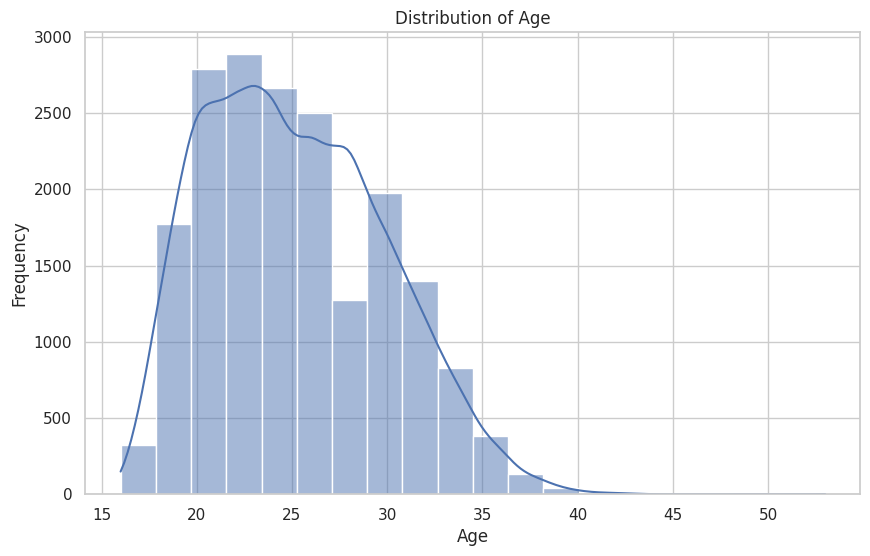

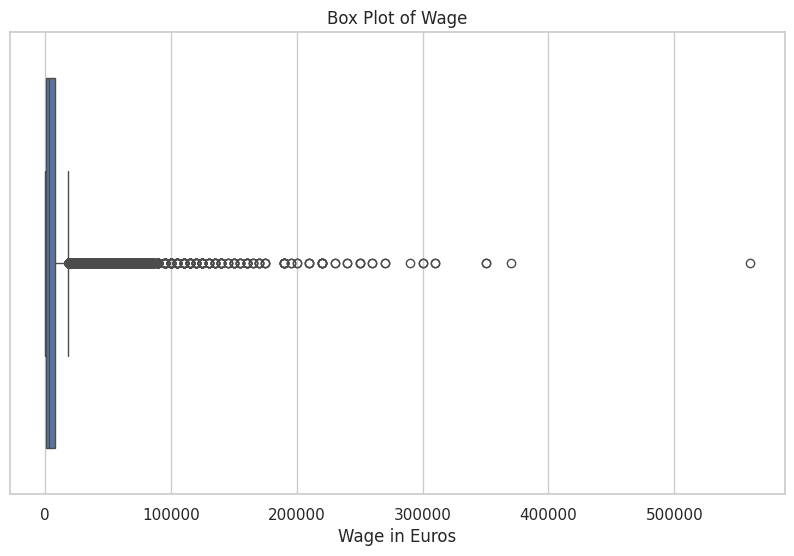

In [563]:
# Histogram for Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Box plot for Wage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Wage in Euros', data=df)
plt.title('Box Plot of Wage')
plt.xlabel('Wage in Euros')
plt.show()

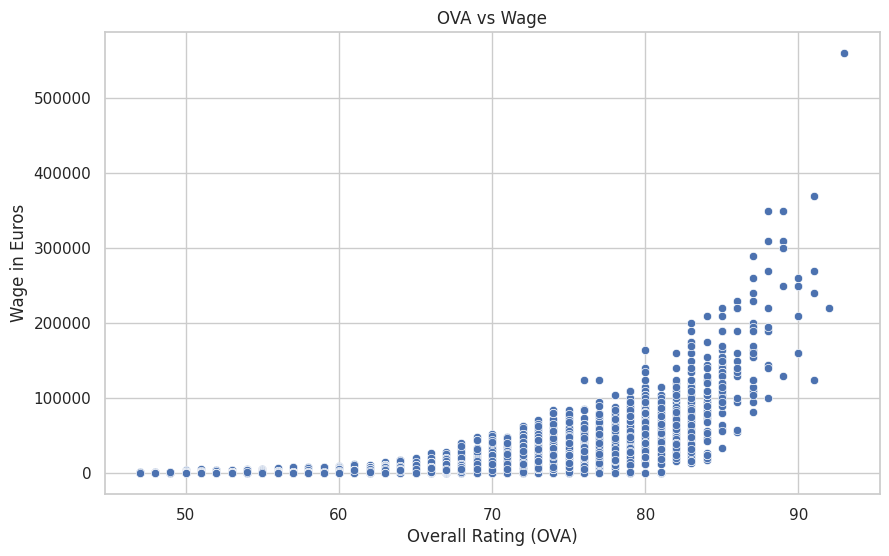

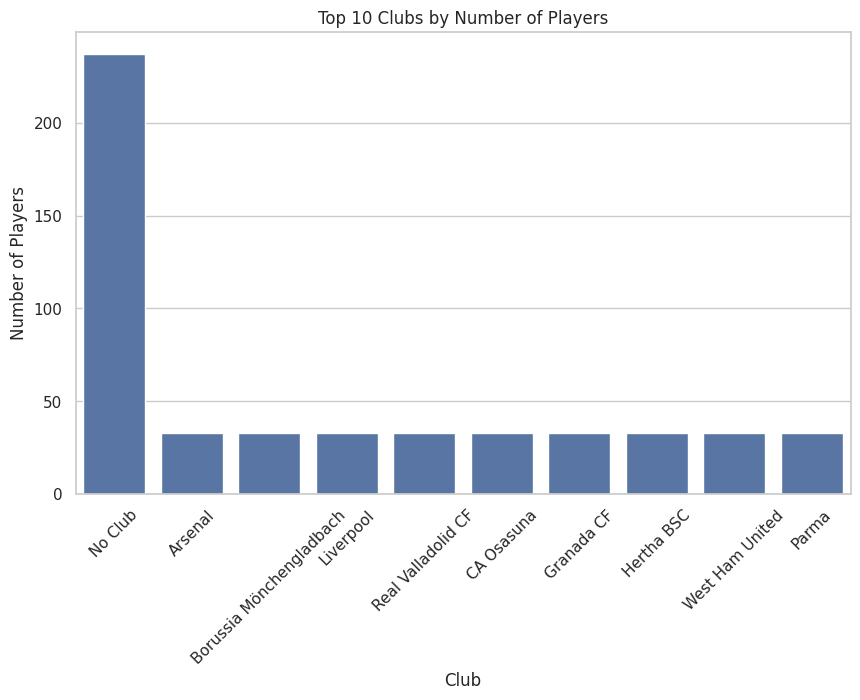

In [564]:
# Scatter plot between OVA and Wage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OVA', y='Wage in Euros', data=df)
plt.title('OVA vs Wage')
plt.xlabel('Overall Rating (OVA)')
plt.ylabel('Wage in Euros')
plt.show()

# Bar plot for Number of Players per Club
club_counts = df['Club'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=club_counts.index, y=club_counts.values)
plt.xticks(rotation=45)
plt.title('Top 10 Clubs by Number of Players')
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.show()

Text(0.5, 1.0, 'Player Potential vs Age')

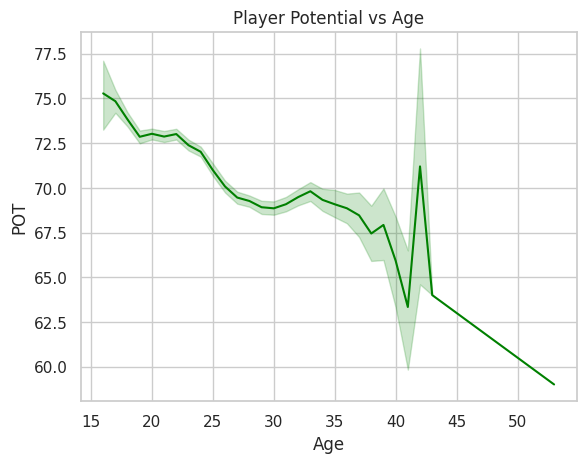

In [565]:
sns.lineplot(x=df['Age'],y=df['POT'],color='green')
plt.title('Player Potential vs Age')

**Top 10 Clubs with Most Players**

In [566]:
top_clubs = df['Club'].value_counts().head(10)

top_clubs_df = top_clubs.reset_index()
top_clubs_df.columns = ['Club', 'Number of Players']

print(top_clubs_df)


                       Club  Number of Players
0                   No Club                237
1                   Arsenal                 33
2  Borussia Mönchengladbach                 33
3                 Liverpool                 33
4        Real Valladolid CF                 33
5                CA Osasuna                 33
6                Granada CF                 33
7                Hertha BSC                 33
8           West Ham United                 33
9                     Parma                 33


In [567]:
position_by_order = ["GK", "LWB", "LB", "CB", "RB", "RWB", "CDM", "LM", "CM", "RM", "CAM", "LW", "CF", "RW", "ST"]


position_colors = {"GK": "blue", "LB": "green", "CB": "green", "RB": "green","LWB": "green","RWB": "green","CDM": "green",
    "LM": "orange","CM": "orange","RM": "orange","CAM": "orange","LW": "red","CF": "red", "RW": "red", "ST": "red"
}
deffensive =["LB", "CB", "RB", "LWB", "RWB", "CDM"]
midfield =["LM", "CM", "RM", "CAM"]
offensive =["LW", "CF", "RW", "ST"]

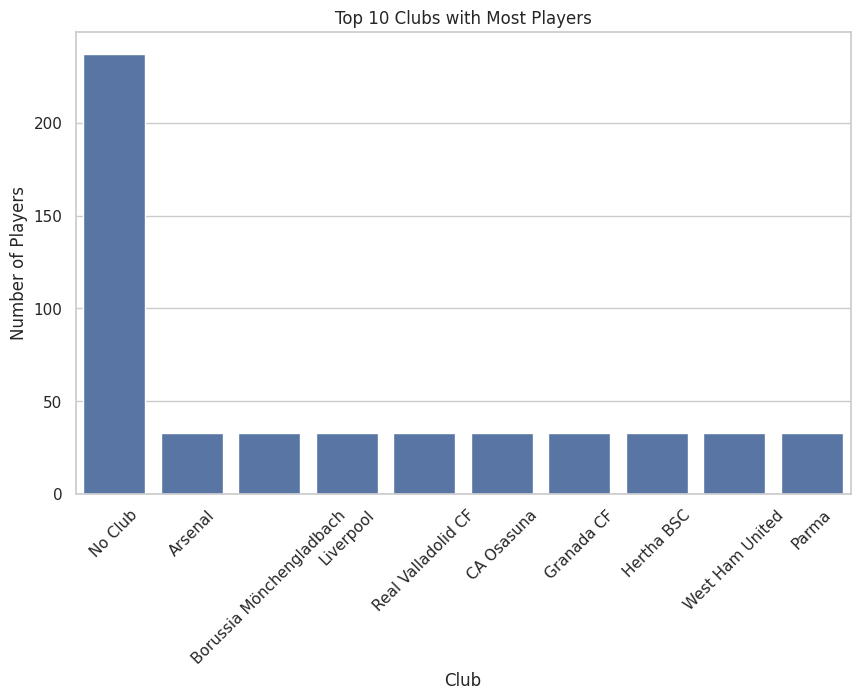

In [568]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Club', y='Number of Players', data=top_clubs_df)
plt.title('Top 10 Clubs with Most Players')
plt.xlabel('Club')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)
plt.show()


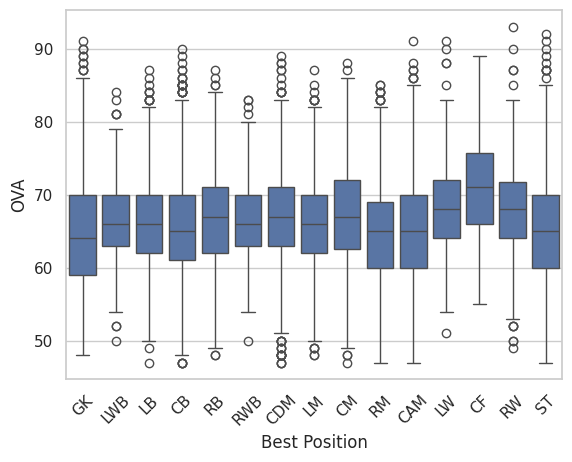

In [569]:
plt.xticks(rotation=45)
sns.boxplot(data=df,x="Best Position",y="OVA",order=position_by_order)
plt.show()

In [570]:
df.describe()

ID           Age           OVA           POT  Height in cm  \
count   18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean   226403.384794     25.194109     65.718636     71.136414    181.190579   
std     27141.054157      4.710520      6.968999      6.114635      6.864817   
min        41.000000     16.000000     47.000000     47.000000    155.000000   
25%    210135.000000     21.000000     61.000000     67.000000    176.000000   
50%    232418.000000     25.000000     66.000000     71.000000    181.000000   
75%    246922.500000     29.000000     70.000000     75.000000    186.000000   
max    259216.000000     53.000000     93.000000     95.000000    206.000000   

       Weight in kg           BOV  Values in Euro Million  Wage in Euros  \
count  18979.000000  18979.000000            18979.000000   18979.000000   
mean      75.019021     66.751726                2.865063    9092.062279   
std        7.073542      6.747193                7.685154   19707.021089   
min       50.000000     48.000000                0.000000       0.000000   
25%       70.000000     62.000000                0.475000    1000.000000   
50%       75.000000     67.000000                0.950000    3000.000000   
75%       80.000000     71.000000                2.000000    8000.000000   
max      110.000000     93.000000              185.500000  560000.000000   

       Release Clause in Euro Million  ...   GK Reflexes   Total Stats  \
count                    18979.000000  ...  18979.000000  18979.000000   
mean                         3.962951  ...     16.519627   1595.286949   
std                          9.772762  ...     17.854079    269.874789   
min                          0.000000  ...      2.000000    747.000000   
25%                          0.423500  ...      8.000000   1452.000000   
50%                          1.000000  ...     11.000000   1627.000000   
75%                          2.800000  ...     14.000000   1781.000000   
max                        203.100000  ...     90.000000   2316.000000   

         Base Stats           PAC           SHO           PAS           DRI  \
count  18979.000000  18979.000000  18979.000000  18979.000000  18979.000000   
mean     355.702197     67.453975     53.457031     57.681016     62.875020   
std       40.761117     10.677859     13.827425     10.081857      9.927415   
min      232.000000     25.000000     16.000000     25.000000     25.000000   
25%      327.000000     61.000000     44.000000     51.000000     57.000000   
50%      356.000000     68.000000     56.000000     58.000000     64.000000   
75%      384.000000     75.000000     64.000000     64.000000     69.000000   
max      498.000000     96.000000     93.000000     93.000000     95.000000   

                DEF           PHY     Hits in K  
count  18979.000000  18979.000000  18979.000000  
mean      49.866221     64.368934     22.789185  
std       16.443213      9.601883     58.321029  
min       12.000000     28.000000      1.000000  
25%       35.000000     58.000000      3.000000  
50%       53.000000     65.000000      7.000000  
75%       63.000000     71.000000     22.789185  
max       91.000000     91.000000    979.000000  

[8 rows x 60 columns]

# **4. Outlier Detection**

**Boxplot Before Outlier**

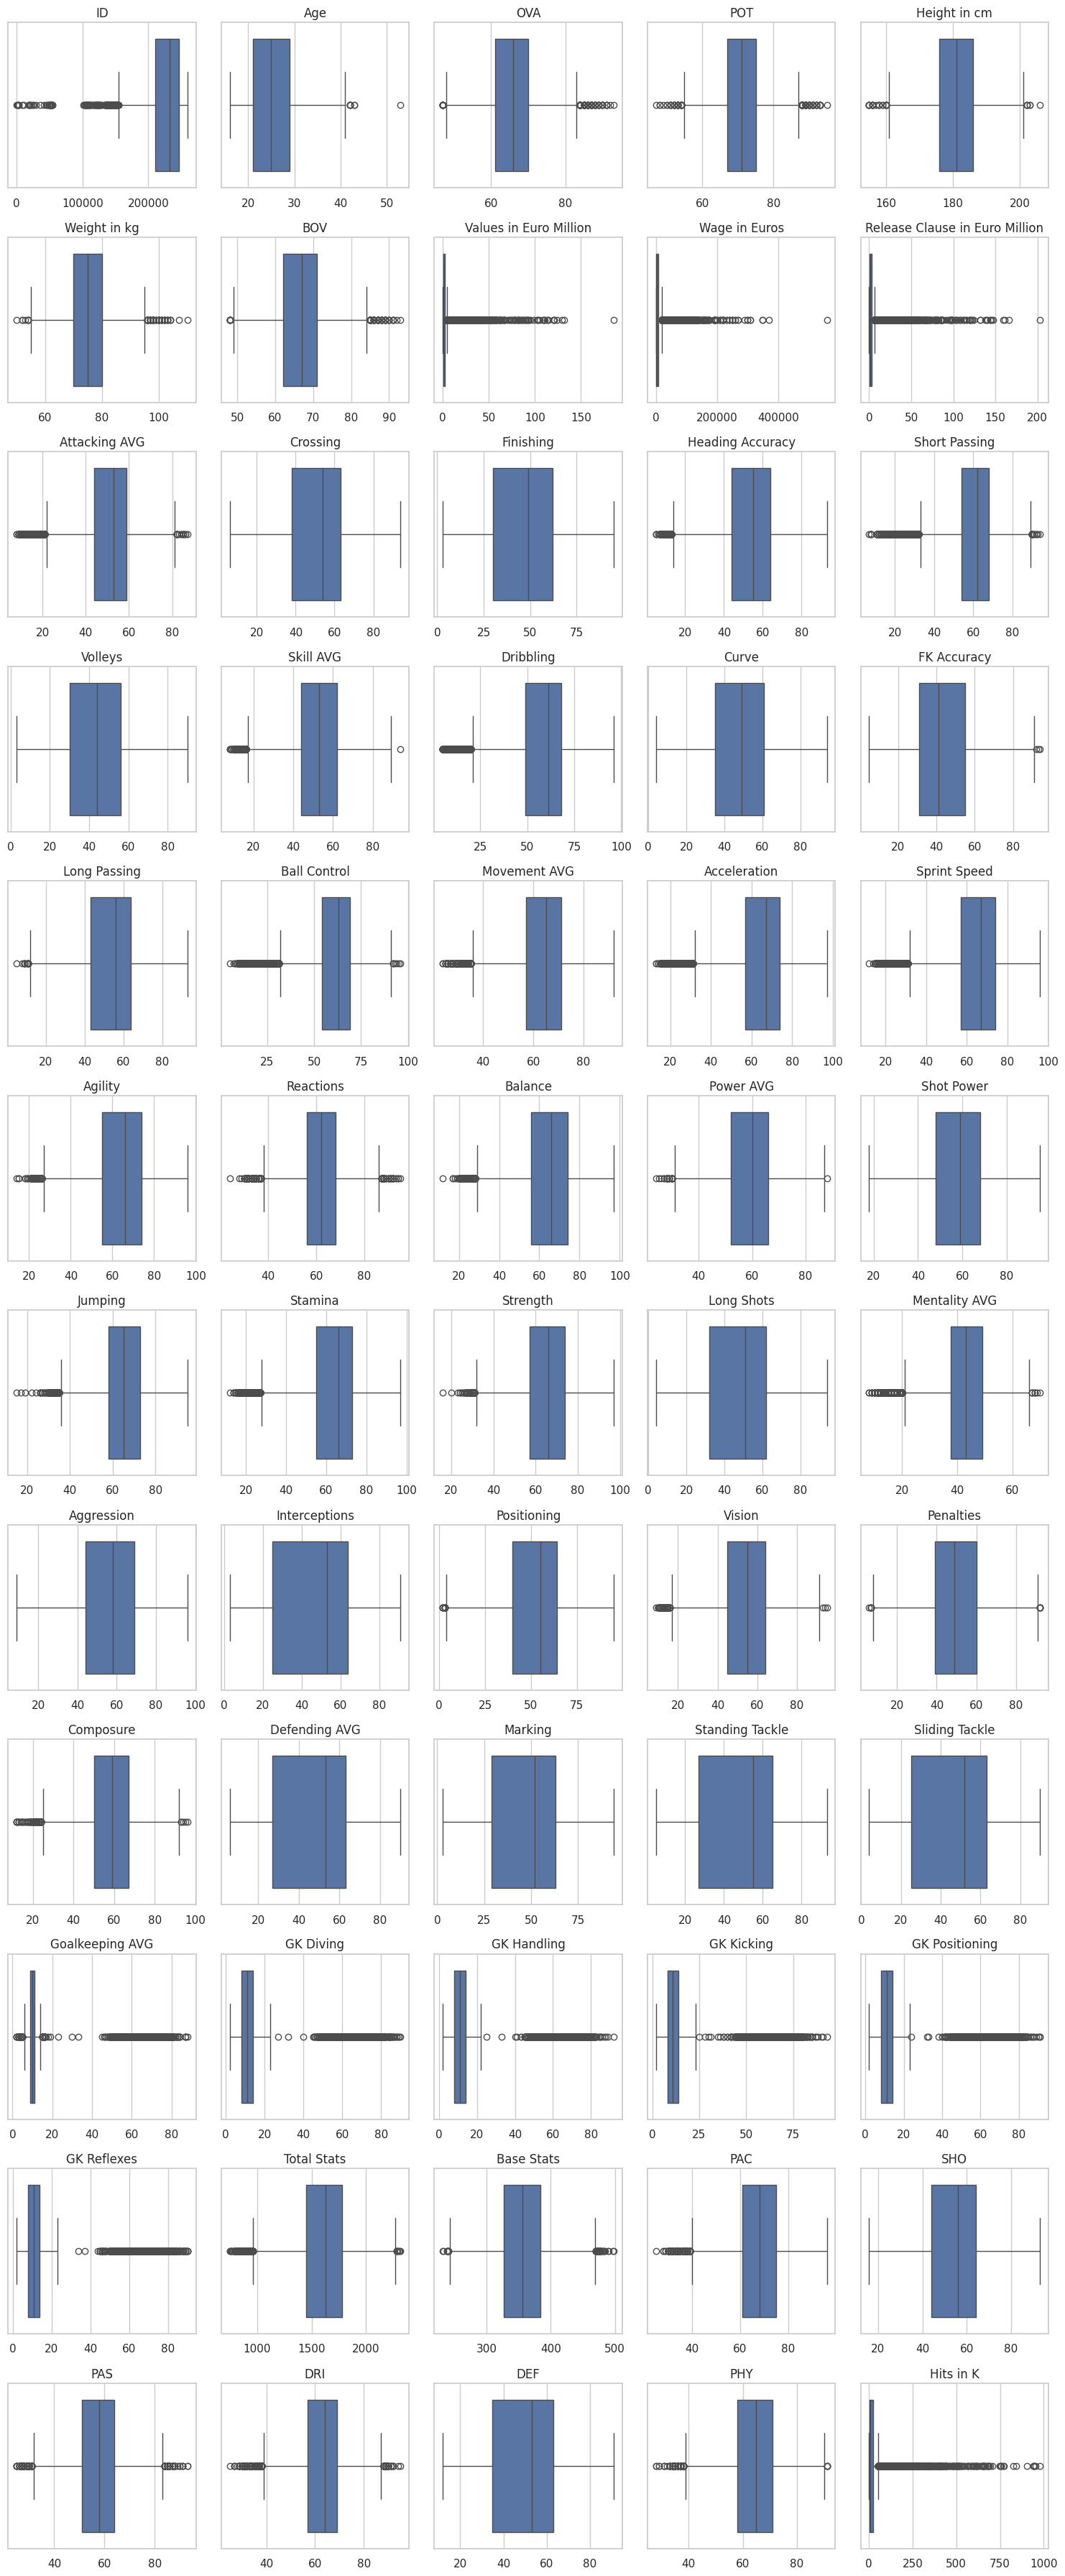

In [571]:
sns.set(style="whitegrid")

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 3, num_rows * 3))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [572]:

def handle_outliers_iqr(df, multiplier=1.5):
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    for column in numerical_columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"Outliers detected in '{column}': {outliers.index.tolist()}")

        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

df = handle_outliers_iqr(df, multiplier=1.5)

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    remaining_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    if not remaining_outliers.empty:
        print(f"Remaining outliers in '{column}': {remaining_outliers.index.tolist()}")
    else:
        print(f"No remaining outliers in '{column}'.")


Outliers detected in 'ID': [1, 17, 39, 55, 59, 133, 141, 209, 262, 350, 366, 368, 494, 501, 502, 503, 504, 681, 682, 683, 684, 793, 796, 877, 890, 892, 893, 894, 898, 916, 932, 935, 1083, 1100, 1144, 1215, 1216, 1235, 1246, 1254, 1277, 1284, 1285, 1296, 1339, 1455, 1513, 1518, 1581, 1649, 1666, 1683, 1759, 1765, 1767, 1840, 1858, 1888, 1892, 1937, 1939, 1964, 2019, 2135, 2173, 2187, 2229, 2256, 2264, 2331, 2395, 2408, 2413, 2433, 2435, 2538, 2541, 2592, 2607, 2638, 2774, 2776, 2878, 2883, 2918, 2958, 2969, 2980, 2983, 3151, 3158, 3230, 3282, 3348, 3400, 3525, 3552, 3585, 3627, 3662, 3667, 3691, 3730, 3878, 3943, 4207, 4211, 4230, 4237, 4263, 4283, 4299, 4358, 4359, 4365, 4366, 4392, 4416, 4483, 4490, 4495, 4523, 4722, 4838, 4871, 4908, 4925, 4967, 5197, 5249, 5280, 5289, 5315, 5322, 5325, 5454, 5498, 5522, 5581, 5636, 5704, 5792, 5890, 5905, 6189, 6197, 6265, 6302, 6400, 6551, 6687, 6715, 6826, 7011, 7112, 7180, 7246, 7257, 7698, 7736, 7905, 7985, 8031, 8118, 8129, 8171, 8344, 8482, 84

**Boxplot After Outlier**

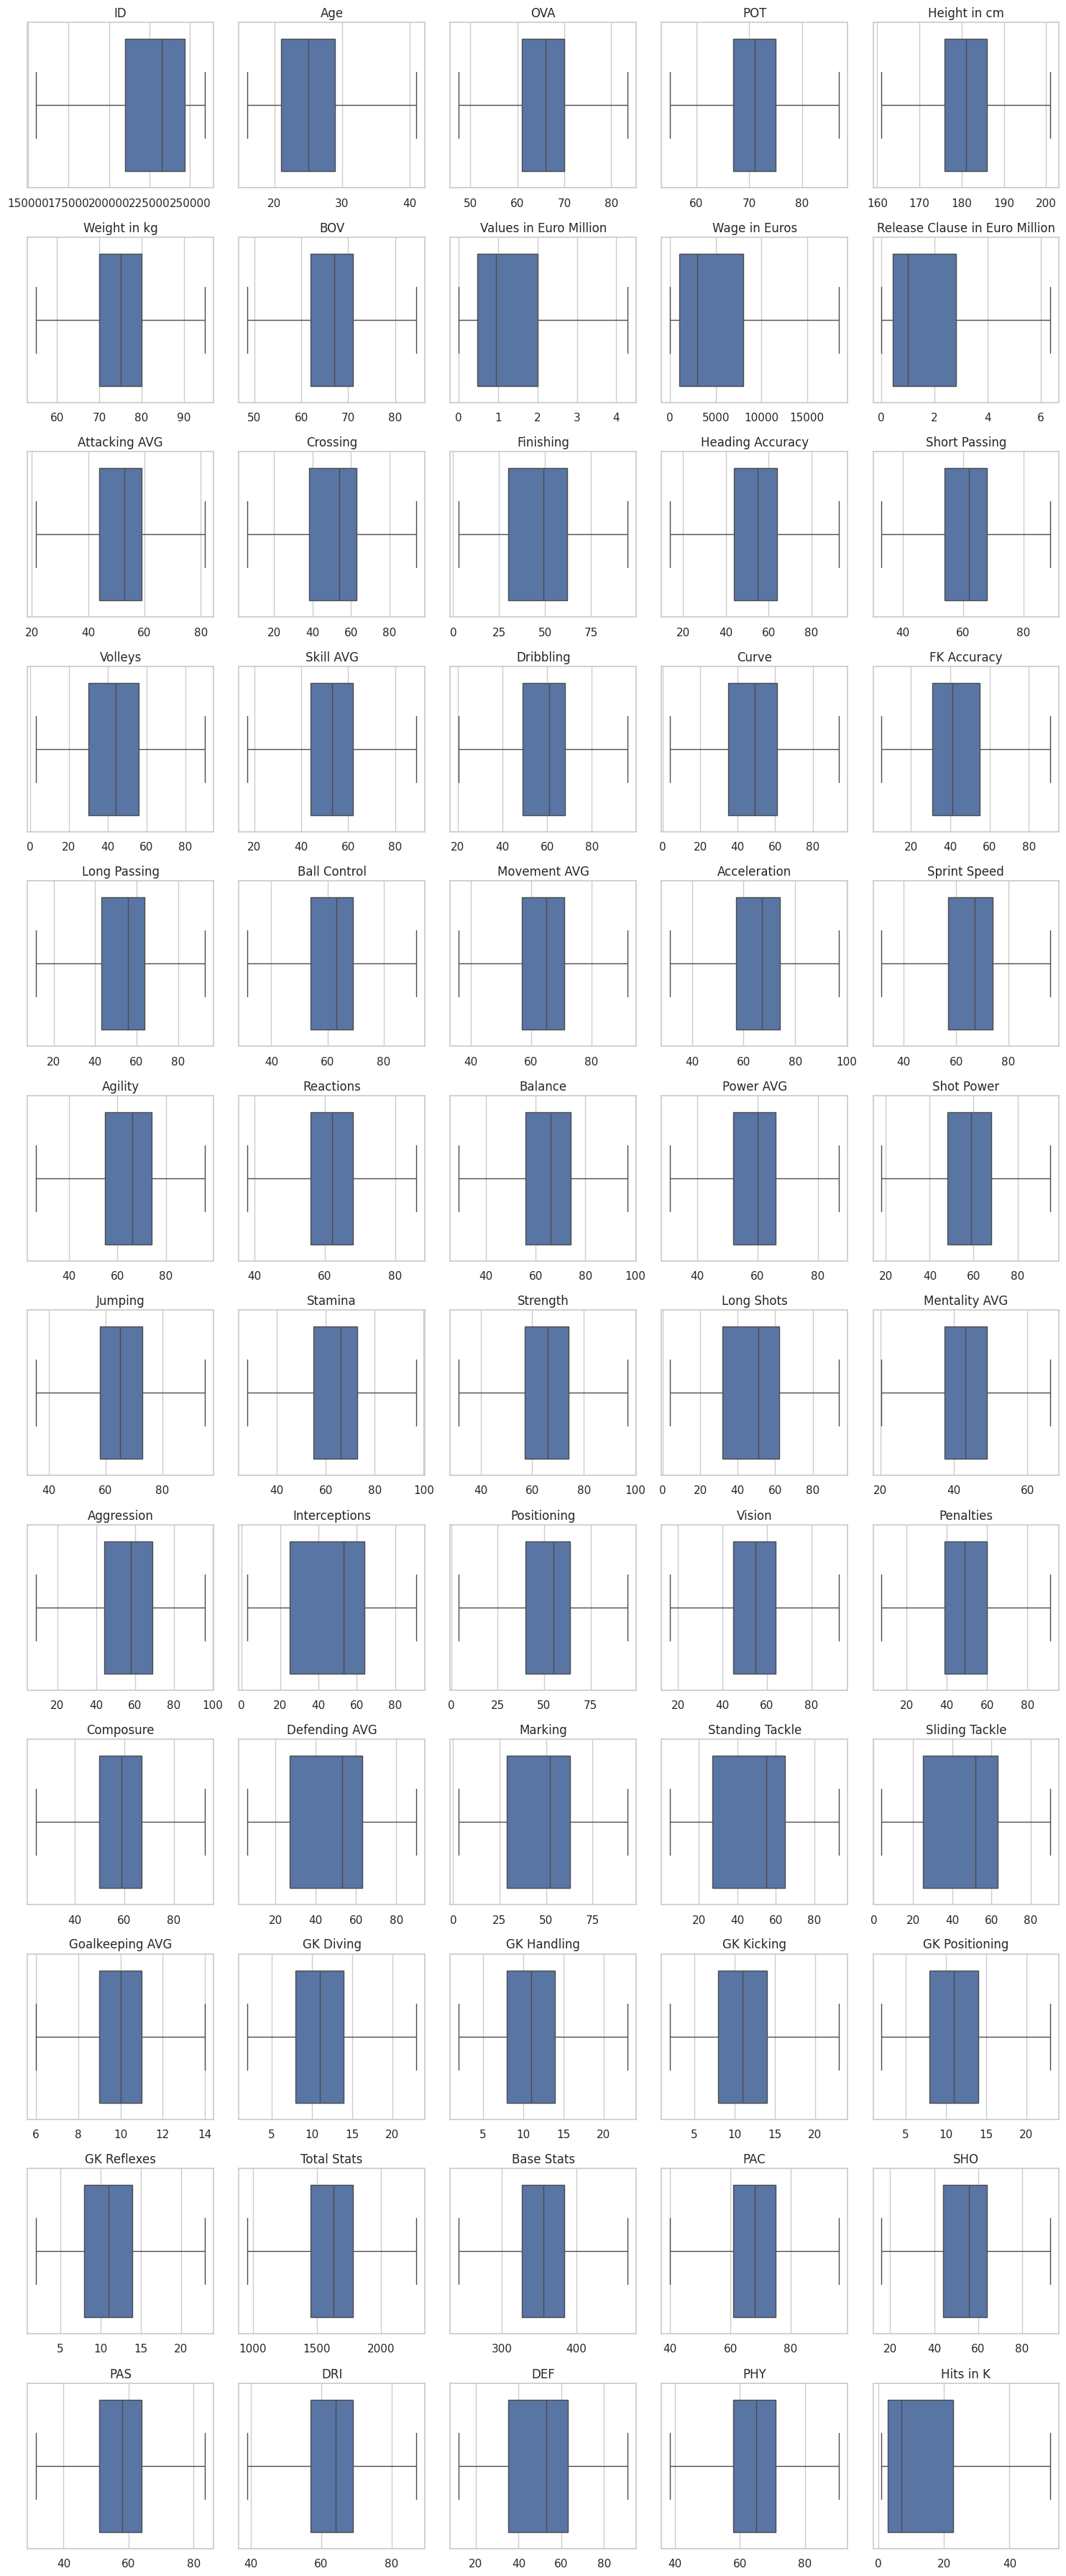

In [573]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_columns = 5
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns  # Round up division

plt.figure(figsize=(num_columns * 3, num_rows * 3))  # Adjust size based on number of plots

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()


# **5. Visualization**

**Histogram**

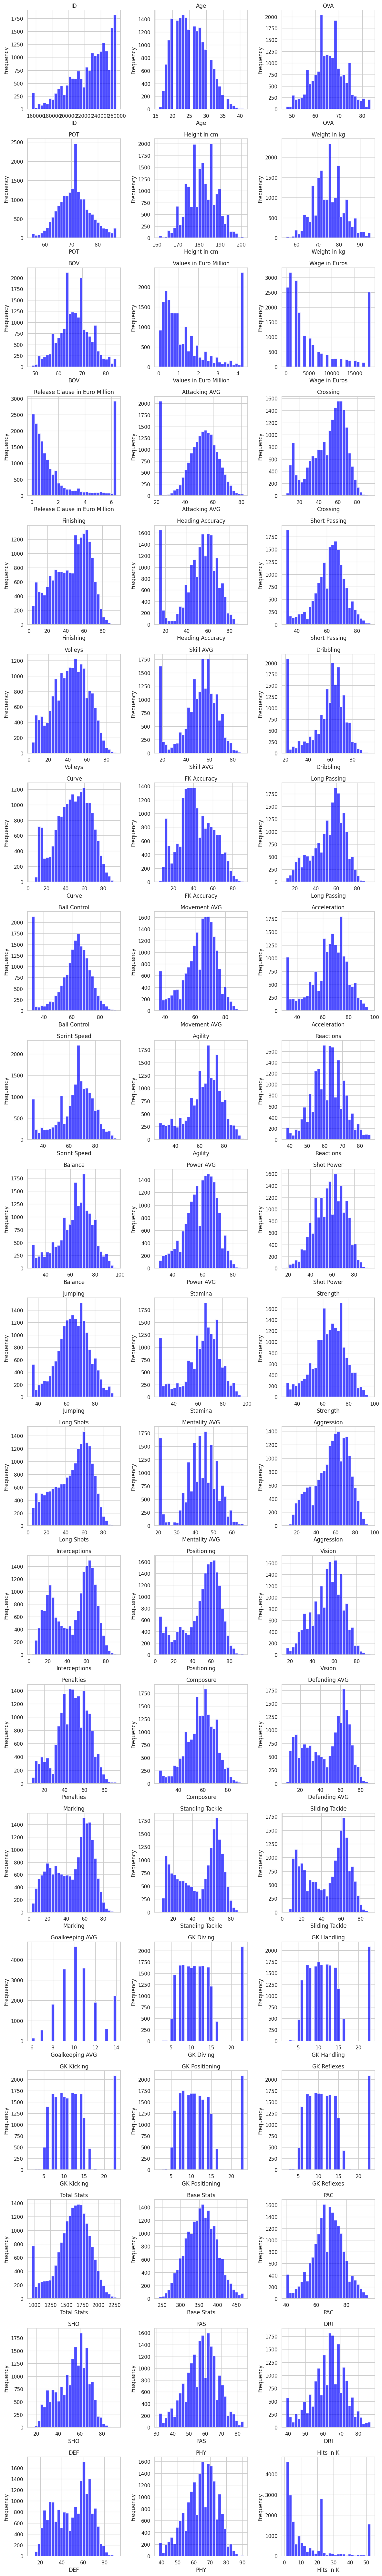

In [574]:

num_columns = 3
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 4, num_rows * 4))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    plt.hist(df[column], bins=30, color='blue', alpha=0.7)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Violin Plot**

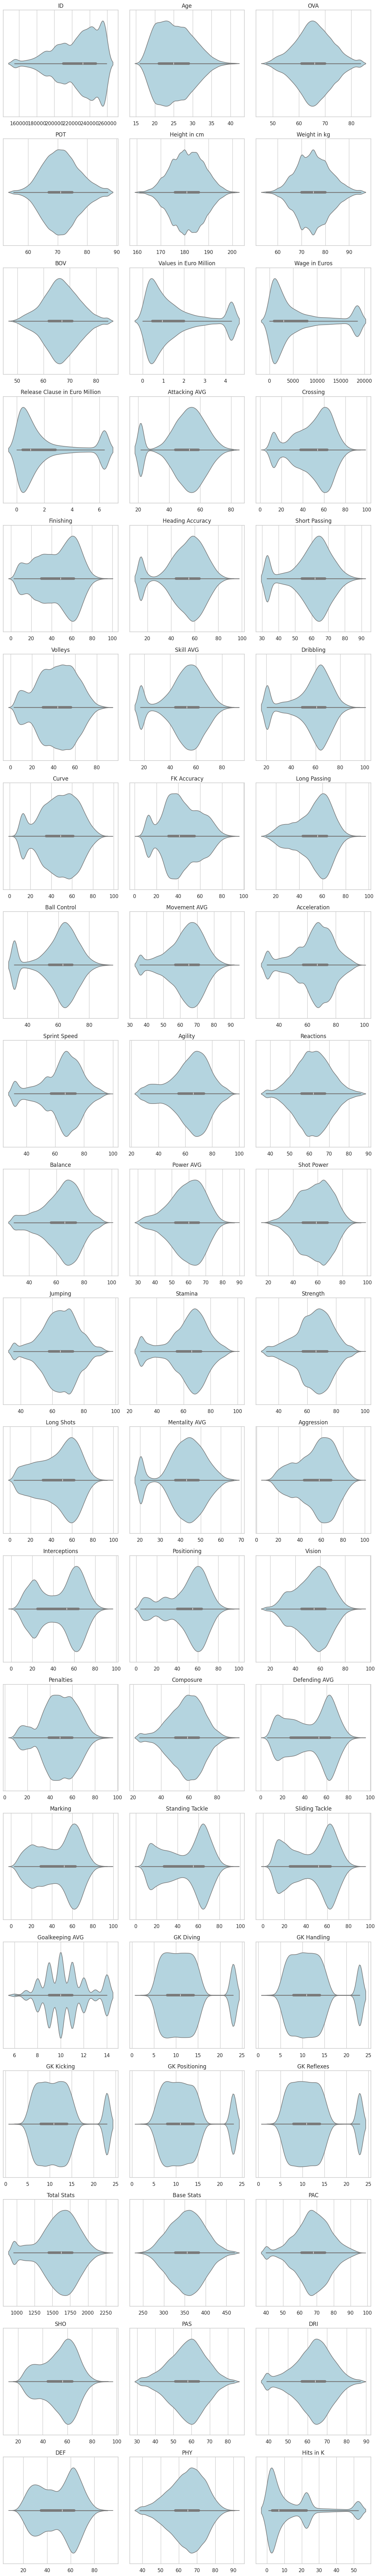

In [575]:

sns.set(style="whitegrid")

num_columns = 3
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns

plt.figure(figsize=(num_columns * 4, num_rows * 4))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.violinplot(x=df[column], color='lightblue')
    plt.title(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()


**Pair Plot**

**Correlation HeatMap**

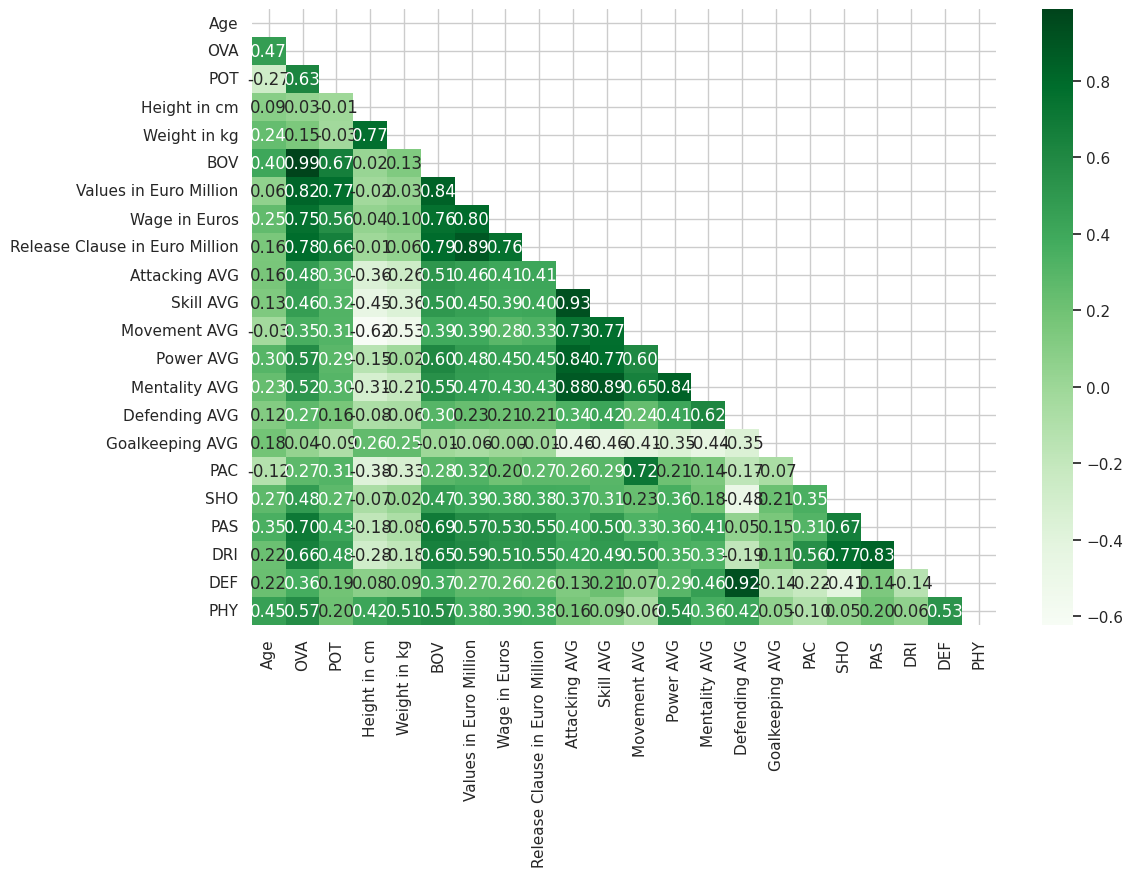

In [576]:
df_s = df[["Age","OVA","POT","Height in cm","Weight in kg","BOV","Values in Euro Million","Wage in Euros","Release Clause in Euro Million","Attacking AVG",
           "Skill AVG","Movement AVG","Power AVG","Mentality AVG","Defending AVG","Goalkeeping AVG","PAC","SHO","PAS",
           "DRI","DEF","PHY"]]


corr_matrix = df_s.corr()


mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Greens", mask=mask)


plt.show()

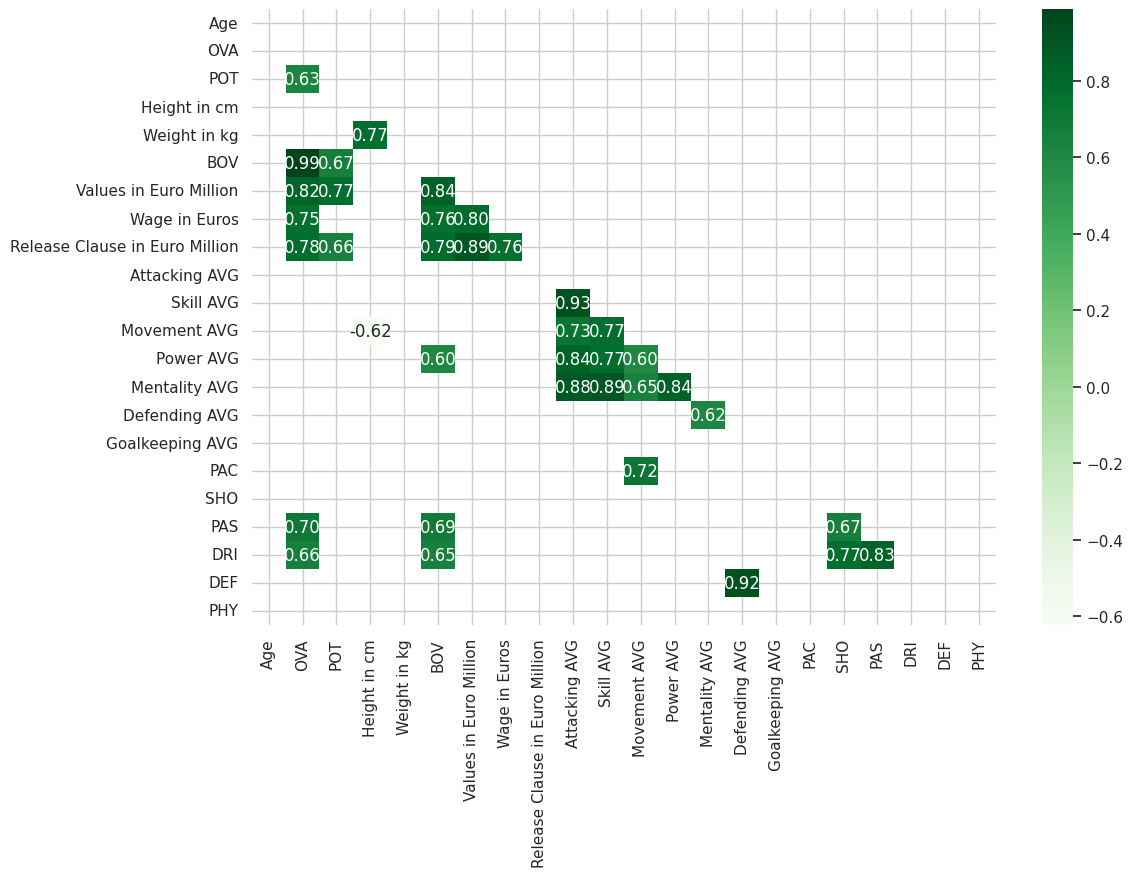

In [577]:
high_corr = corr_matrix[(corr_matrix > 0.6) | (corr_matrix < -0.6)]

mask = np.triu(np.ones_like(high_corr, dtype=bool))

plt.figure(figsize=(12, 8))

sns.heatmap(high_corr, annot=True, fmt=".2f", cmap="Greens", mask=mask)

plt.show()

**Player Counts in Diffrent Countries**

In [578]:
import plotly.express as px

nationality_counts = df['Nationality'].value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Count']

fig = px.choropleth(
    data_frame=nationality_counts,
    locations='Nationality',
    locationmode='country names',
    color='Nationality',
    hover_name='Nationality',
    hover_data={'Count': True},
    scope='world',
    title='Player Count by Nationality'
)

fig.show()

**Top 5 POT Players**

In [579]:
top_players = df.nlargest(10, 'OVA')
fig = px.bar(top_players, x='Best Position', y='OVA', hover_name='Name',
             title='Top 10 Players by Position')
fig.show()

**Total Value of Players by Club**

In [580]:
fig = px.treemap(df, path=['Club'], values='Values in Euro Million', title='Total Value of Players by Club')
fig.show()

**Countries with the most players in the top 100**

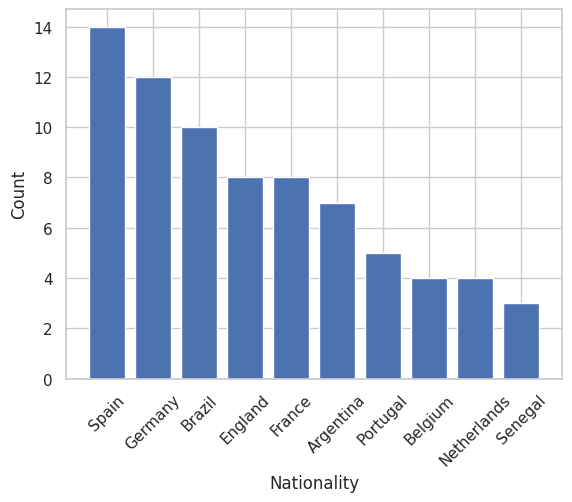

In [581]:
df100 = df.sort_values(by="OVA",ascending=False)
df100 = df100[0:100]
nationality_counts = df100.groupby("Nationality").size().reset_index(name="Count")
nationality_counts = nationality_counts.sort_values(by="Count", ascending=False)
nationality_counts = nationality_counts[0:10]

plt.bar(nationality_counts["Nationality"], nationality_counts["Count"])
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Relation between Age and Overall (OVA) with Size indicating Potential (Growth)**

Text(0.5, 1.0, 'Offensive Positions')

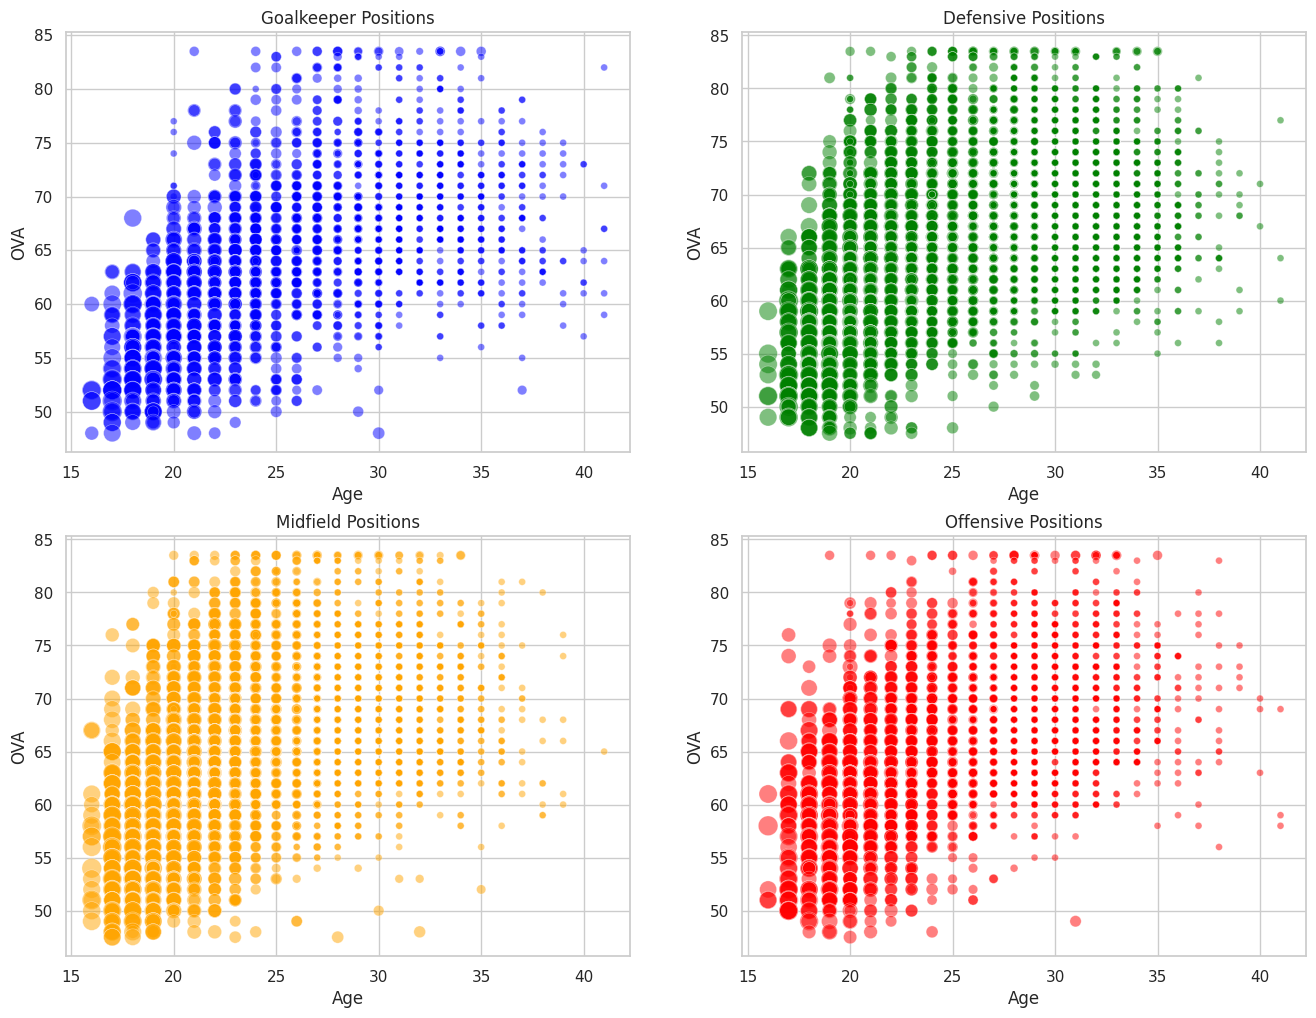

In [582]:
df["Growth"]=df["POT"]-df["OVA"]
plt.figure(figsize=(16, 12))

df_gk= df[df["Best Position"] == "GK"]
df_def = df[df["Best Position"].isin(deffensive)]
df_mid = df[df["Best Position"].isin(midfield)]
df_off = df[df["Best Position"].isin(offensive)]

plt.subplot(2, 2, 1)

sns.scatterplot(data=df_gk, x="Age", y="OVA", hue="Best Position", palette=position_colors, size="Growth", sizes=(25, 200), alpha=0.5,legend=False)
plt.xlabel("Age")
plt.ylabel("OVA")
plt.title("Goalkeeper Positions")

plt.subplot(2, 2, 2)

sns.scatterplot(data=df_def, x="Age", y="OVA", hue="Best Position", palette=position_colors, size="Growth", sizes=(25, 200), alpha=0.5,legend=False)
plt.xlabel("Age")
plt.ylabel("OVA")
plt.title("Defensive Positions")

plt.subplot(2, 2, 3)

sns.scatterplot(data=df_mid, x="Age", y="OVA", hue="Best Position", palette=position_colors, size="Growth", sizes=(25, 200), alpha=0.5,legend=False)
plt.xlabel("Age")
plt.ylabel("OVA")
plt.title("Midfield Positions")



plt.subplot(2, 2, 4)

sns.scatterplot(data=df_off, x="Age", y="OVA", hue="Best Position", palette=position_colors, size="Growth", sizes=(25, 200), alpha=0.5,legend=False)
plt.xlabel("Age")
plt.ylabel("OVA")
plt.title("Offensive Positions")

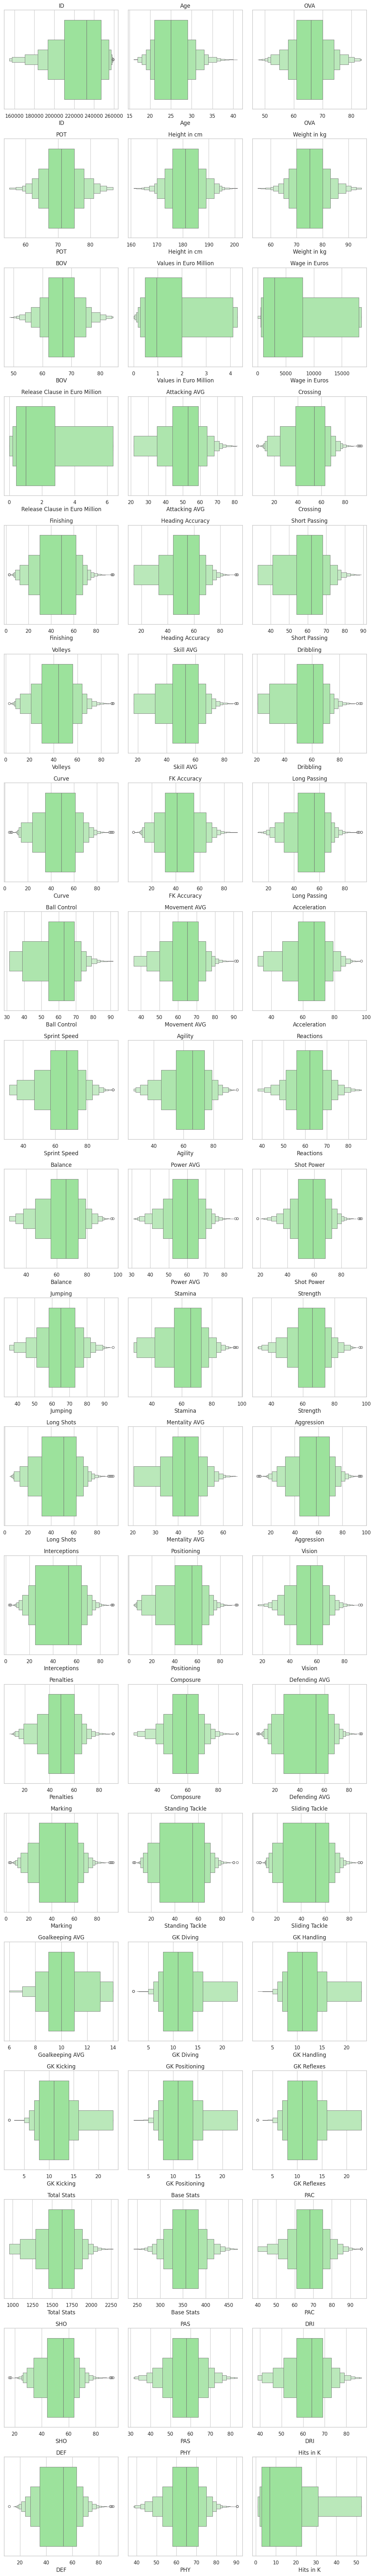

In [583]:

num_columns = 3
num_rows = (len(numerical_columns) + num_columns - 1) // num_columns
plt.figure(figsize=(num_columns * 4, num_rows * 4))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)
    sns.boxenplot(x=df[column], color='lightgreen')
    plt.title(column)

plt.tight_layout()
plt.show()

# **Cleaned Data Saved as CSV**

In [584]:
df.to_csv('Cleaned_Emergio_EDA_football_data.csv', index=False)